# Moon trajectory

##  Euler method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Define a drawing function

def draw(x_list, y_list, method_names):
    assert len(x_list) == len(y_list) == len(method_names)
    fig = plt.figure()
    plt.title('Moon trajectory',size = 18)
    plt.scatter(0,0,s = 50,label = 'Earth positon')
    for i in range(len(x_list)):
        plt.plot(x_list[i], y_list[i], label = method_names[i])
    plt.legend(loc = 'upper left')
    plt.xlabel ('x',size = 15)
    plt.ylabel ('y',size = 15)
    plt.show()

In [3]:
def earth_orbit_euler(τ , N):   # N is the number of steps. So it needs to be adjusted with τ.
    
    # Set parameters
    G = 6.6743*10**(-11)
    e = 0.0549
    dt = τ*1*24*3600
    dl = 3.84748*10**8
    dm = 5.972*10**24
    a = 1*dl
    M = 1*dm
    m = 0.0123*dm
    mu = G*(M+m)

    # Set initial conditions
    t_eu = [0]
    x_eu = [a*(1-e)]
    y_eu = [0]
    vx_eu = [0]
    vy_eu = [math.sqrt((mu*(1+e))/(a*(1-e)))]

    # Implement Euler method
    for i in range(1,N):
        t_eu.append(dt*i)
        x_eu.append(x_eu[i-1]+dt*vx_eu[i-1])
        vx_eu.append(vx_eu[i-1]-dt*mu*x_eu[i-1]/(x_eu[i-1]**2+y_eu[i-1]**2)**1.5)
        y_eu.append(y_eu[i-1]+dt*vy_eu[i-1])
        vy_eu.append(vy_eu[i-1]-dt*mu*y_eu[i-1]/(x_eu[i-1]**2+y_eu[i-1]**2)**1.5)
    
    return x_eu, y_eu

Use τ=0.5 day

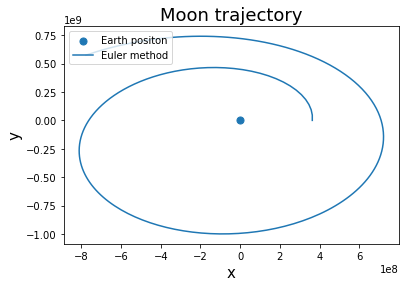

In [4]:
x_eu, y_eu = earth_orbit_euler(0.5, 200)
draw([x_eu],[y_eu],['Euler method'])

Use τ=0.1 day

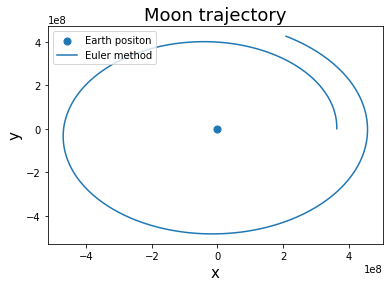

In [5]:
x_eu, y_eu = earth_orbit_euler(0.1, 400)
draw([x_eu],[y_eu],['Euler method'])

Use τ=0.05 day

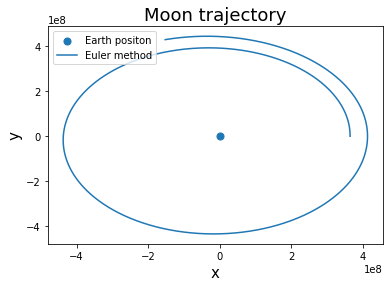

In [6]:
x_eu, y_eu = earth_orbit_euler(0.05, 800)
draw([x_eu],[y_eu],['Euler method'])

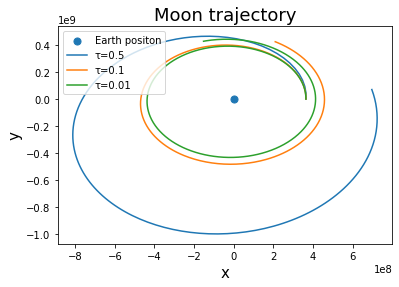

In [7]:
# Compare different tau.

x_eu_1, y_eu_1 = earth_orbit_euler(0.5, 150)
x_eu_2, y_eu_2 = earth_orbit_euler(0.1, 400)
x_eu_3, y_eu_3 = earth_orbit_euler(0.05, 800)
draw([x_eu_1, x_eu_2, x_eu_3], [y_eu_1, y_eu_2, y_eu_3], ['τ=0.5', 'τ=0.1', 'τ=0.01'])

Summary: Obviously the results will become more accurate as τ decreases.

## Velocity Verlet method

In [8]:
def earth_orbit_velocity_verlet(τ , N):
    
    # Set parameters
    G = 6.6743*10**(-11)
    e = 0.0549
    dt = τ*1*24*3600
    dl = 3.84748*10**8
    dm = 5.972*10**24
    a = 1*dl
    M = 1*dm
    m = 0.0123*dm
    mu = G*(M+m)

    # Set initial conditions
    t_v = [0]
    x_v = [a*(1-e)]
    y_v = [0]
    vx_v = [0]
    vy_v = [math.sqrt((mu*(1+e))/(a*(1-e)))]

    # Implement Velocity Verlet method
    for i in range(1,N):
        t_v.append(dt*i)
        x_v.append(x_v[i-1]+dt*vx_v[i-1]-0.5*(dt**2)*mu*x_v[i-1]/(x_v[i-1]**2+y_v[i-1]**2)**1.5)
        y_v.append(y_v[i-1]+dt*vy_v[i-1]-0.5*(dt**2)*mu*y_v[i-1]/(x_v[i-1]**2+y_v[i-1]**2)**1.5)
        vx_v.append(vx_v[i-1]-0.5*dt*(mu*x_v[i-1]/(x_v[i-1]**2+y_v[i-1]**2)**1.5+mu*x_v[i]/(x_v[i]**2+y_v[i]**2)**1.5))
        vy_v.append(vy_v[i-1]-0.5*dt*(mu*y_v[i-1]/(x_v[i-1]**2+y_v[i-1]**2)**1.5+mu*y_v[i]/(x_v[i]**2+y_v[i]**2)**1.5))

    return x_v, y_v    

Use τ=2 day

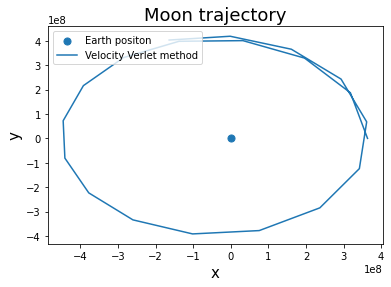

In [9]:
x_v, y_v = earth_orbit_velocity_verlet(2,20)
draw([x_v],[y_v],['Velocity Verlet method'])

Use τ=1 day

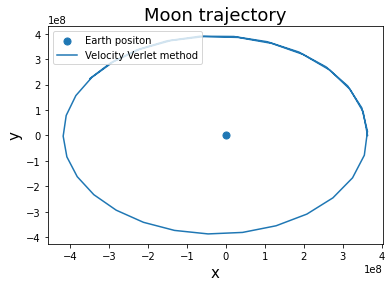

In [10]:
x_v, y_v = earth_orbit_velocity_verlet(1,40)
draw([x_v],[y_v],['Velocity Verlet method'])

Use τ=0.1 day

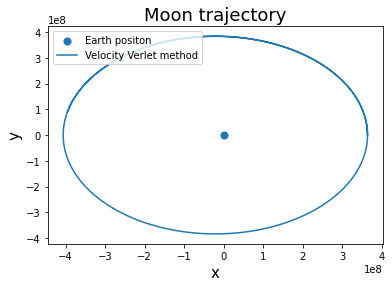

In [11]:
x_v, y_v = earth_orbit_velocity_verlet(0.1,400)
draw([x_v],[y_v],['Velocity Verlet method'])

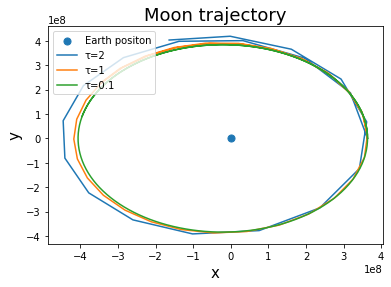

In [12]:
# Compare different tau.

x_v_1, y_v_1 = earth_orbit_velocity_verlet(2, 20)
x_v_2, y_v_2 = earth_orbit_velocity_verlet(1, 40)
x_v_3, y_v_3 = earth_orbit_velocity_verlet(0.1, 400)
draw([x_v_1, x_v_2, x_v_3], [y_v_1, y_v_2, y_v_3], ['τ=2', 'τ=1', 'τ=0.1'])

Summary: As with in Euler method, a smoother curve can be drawn with a smaller τ.

## Runge-Kutta method

In [13]:
def earth_orbit_RungeKutta(τ , N):
    
    # Set parameters
    G = 6.6743*10**(-11)
    e = 0.0549
    dt = τ*1*24*3600
    dl = 3.84748*10**8
    dm = 5.972*10**24
    a = 1*dl
    M = 1*dm
    m = 0.0123*dm
    mu = G*(M+m)

    # Set initial conditions
    t_rk = [0]
    x_rk = [a*(1-e)]
    y_rk = [0]
    vx_rk = [0]
    vy_rk = [math.sqrt((mu*(1+e))/(a*(1-e)))]

    # Implement Runge-Kutta method
    for i in range(1,N):
        t_rk.append(dt*i)
        
        kx1 = dt*vx_rk[i-1]
        ky1 = dt*vy_rk[i-1]
        lx1 = -dt*mu*x_rk[i-1]/(x_rk[i-1]**2+y_rk[i-1]**2)**1.5
        ly1 = -dt*mu*y_rk[i-1]/(x_rk[i-1]**2+y_rk[i-1]**2)**1.5
        kx2 = dt*(vx_rk[i-1]+0.5*lx1)
        ky2 = dt*(vy_rk[i-1]+0.5*ly1)
        lx2 = -dt*mu*(x_rk[i-1]+0.5*kx1)/((x_rk[i-1]+0.5*kx1)**2+(y_rk[i-1]+0.5*ky1)**2)**1.5
        ly2 = -dt*mu*(y_rk[i-1]+0.5*ky1)/((x_rk[i-1]+0.5*kx1)**2+(y_rk[i-1]+0.5*ky1)**2)**1.5
        kx3 = dt*(vx_rk[i-1]+0.5*lx2)
        ky3 = dt*(vy_rk[i-1]+0.5*ly2)
        lx3 = -dt*mu*(x_rk[i-1]+0.5*kx2)/((x_rk[i-1]+0.5*kx2)**2+(y_rk[i-1]+0.5*ky2)**2)**1.5
        ly3 = -dt*mu*(y_rk[i-1]+0.5*ky2)/((x_rk[i-1]+0.5*kx2)**2+(y_rk[i-1]+0.5*ky2)**2)**1.5
        kx4 = dt*(vx_rk[i-1]+lx3)
        ky4 = dt*(vy_rk[i-1]+ly3)
        lx4 = -dt*mu*(x_rk[i-1]+kx3)/((x_rk[i-1]+kx3)**2+(y_rk[i-1]+ky3)**2)**1.5
        ly4 = -dt*mu*(y_rk[i-1]+ky3)/((x_rk[i-1]+kx3)**2+(y_rk[i-1]+ky3)**2)**1.5
        
        x_rk.append(x_rk[i-1]+(1/6)*(kx1+2*kx2+2*kx3+kx4))
        vx_rk.append(vx_rk[i-1]+(1/6)*(lx1+2*lx2+2*lx3+lx4))
        y_rk.append(y_rk[i-1]+(1/6)*(ky1+2*ky2+2*ky3+ky4))
        vy_rk.append(vy_rk[i-1]+(1/6)*(ly1+2*ly2+2*ly3+ly4))

    return x_rk, y_rk

Use τ=3 day

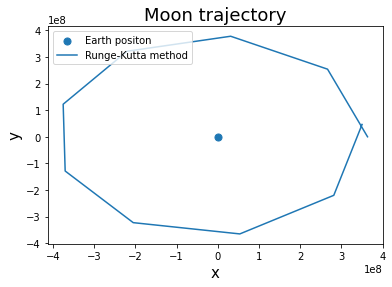

In [14]:
x_rk, y_rk = earth_orbit_RungeKutta(3,10)
draw([x_rk],[y_rk],['Runge-Kutta method'])

Use τ=1 day

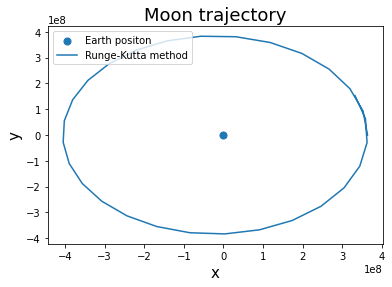

In [15]:
x_rk, y_rk = earth_orbit_RungeKutta(1,30)
draw([x_rk],[y_rk],['Runge-Kutta method'])

Use τ=0.5 day

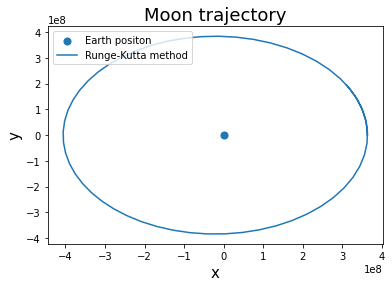

In [16]:
x_rk, y_rk = earth_orbit_RungeKutta(0.5,60)
draw([x_rk],[y_rk],['Runge-Kutta method'])

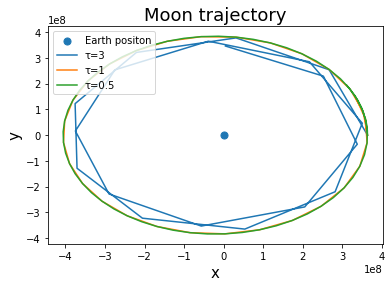

In [17]:
# Compare different tau.

x_rk_1, y_rk_1 = earth_orbit_RungeKutta(3,20)
x_rk_2, y_rk_2 = earth_orbit_RungeKutta(1,30)
x_rk_3, y_rk_3 = earth_orbit_RungeKutta(0.5,60)
draw([x_rk_1, x_rk_2, x_rk_3], [y_rk_1, y_rk_2, y_rk_3], ['τ=3', 'τ=1', 'τ=0.5'])

Slightly different from the results of the first two methods, when τ in the RungeKutta method is too large, the lunar orbit will collapse.

##  Compare the results from different methods.

For the convenience of comparison, the same τ is chosen among the three methods.

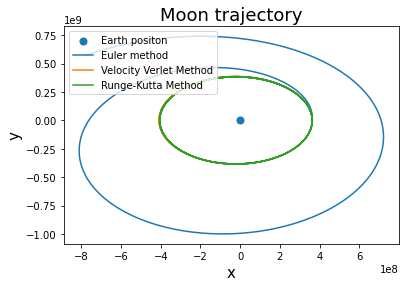

In [18]:
x_eu, y_eu = earth_orbit_euler(0.5,200)
x_v, y_v = earth_orbit_velocity_verlet(0.5,200)
x_rk, y_rk = earth_orbit_RungeKutta(0.5,200)

draw([x_eu, x_v, x_rk], [y_eu, y_v, y_rk], ['Euler method', 'Velocity Verlet Method', 'Runge-Kutta Method'])

Summary: From the above figure, it can be seen that the results of Velocity Verlet method (yellow line) and Runge-Kutta (green line) method are much more accurate than outcome of Euler method (blue line). Among them, the trajectory obtained by Runge-Kutta method (green line) is the best one.

#  Prove Kepler’s second law

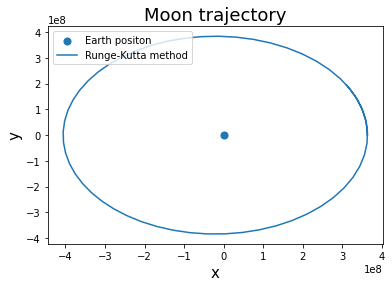

In [19]:
# Calculate the trajectory of moon by Runge-Kutta.
x_rk, y_rk = earth_orbit_RungeKutta(0.5,60)
draw([x_rk],[y_rk],['Runge-Kutta method'])

To prove Kepler's second law. I will calculate the area swept by the moon in every day.

With τ equal to 0.5, the area swept every 0.5 days is a triangle. Adding the areas of the two triangles gives the area swept by the moon in one day.

Among them, we can use the coordinates of the three vertices to calculate the area of each triangle.
S=(1/2)*(x1*y2+x2*y3+x3*y1-x1*y3-x2*y1-x3*y2)

In [20]:
# Calculate the area swept by the moon in one day. In here, the area is 's'.
s = []
for i in range(1,17):
    s.append(0.5*(x_rk[i]*y_rk[i+1]-x_rk[i+1]*y_rk[i]+x_rk[i+1]*y_rk[i+2]-x_rk[i+2]*y_rk[i+1]))
    
print(s)

[1.6951370605920996e+16, 1.695164605389402e+16, 1.6952021401333848e+16, 1.6952486701951316e+16, 1.6953030144089664e+16, 1.695363864397302e+16, 1.6954298442068244e+16, 1.6954995657540324e+16, 1.6955716767057562e+16, 1.695644898735835e+16, 1.6957180553739532e+16, 1.695790089731306e+16, 1.69586007316263e+16, 1.6959272063883836e+16, 1.69599081478905e+16, 1.6960503395585932e+16]


Summary: It can be seen that the areas swept by moon in every day are equal. So Kepler's second law is correct.